
<div style="text-align: center;">
  <div style="display: flex; justify-content: center;">
    <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRQHBG_JmpOhUxcbMLkJlZcrmEWNDLjJb1ufK7peaaJPPmDBiYBeAhIplBT-X3efpIAN5g&usqp=CAU" alt="IPL Data Analysis In Databricks Using PySpark" style="margin-bottom: 10px; width: 200px;">
  </div>
  <h2 style="margin-top: 0;">IPL Data Analysis In Databricks Using PySpark</h2>
</div>


In [0]:
from pyspark.sql.window import Window
from pyspark.sql.functions import count, col, sum, max, min, dense_rank, row_number, expr, when
import matplotlib.pyplot as plt 

In [0]:
ball_by_ball_path = "dbfs:/FileStore/tables/IPL/deliveries.csv"
matches_path = "dbfs:/FileStore/tables/IPL/matches.csv"

ball_by_ball = spark.read.csv(ball_by_ball_path, header=True, inferSchema= True)
matches = spark.read.csv(matches_path, header=True, inferSchema= True)

join_df = ball_by_ball.join(matches, ball_by_ball['match_id'] == matches['id'], how="INNER")


#### 1.Find out max and min wicket taken by a bowler in each season ?

In [0]:

def wickets_sum():
    return(ball_by_ball.join(matches, ball_by_ball['match_id'] == matches['id'], how="INNER").
                select("Season", "bowler","is_wicket").
                filter(col("is_wicket") == 1).
                groupBy("Season","bowler").
                agg(sum(col("is_wicket")).alias("total_wickets"))
    )

def max_wickets_taken_each_season():

    max_wickets = (wickets_sum().groupBy("Season","bowler").
                agg(max(col("total_wickets")).alias("wickets")).
                orderBy(col("Season").desc(),col("wickets").desc())
                )

    # defin window specification for identifying max wicket taken by a bowler in each season

    max_windowspec = Window.partitionBy(col("Season")).orderBy(col("wickets").desc())

    return(display(max_wickets.withColumn("rank", dense_rank().over(max_windowspec)).filter(col("rank") == 1)))

def min_wickets_taken_each_season():
    min_wickets = (wickets_sum().groupBy("Season","bowler").
                agg(min(col("total_wickets")).alias("wickets")).
                orderBy(col("Season").desc(),col("wickets").desc())
                )
    # defin window specification for identifying min wicket taking bowler in each season

    min_windowspec = Window.partitionBy(col("Season")).orderBy(col("wickets"))

    return((min_wickets.withColumn("rank", dense_rank().over(min_windowspec)).filter(col("rank") == 1)))

In [0]:
displayHTML("<h3>Min wickets taken in each season.</h3>")
display(min_wickets_taken_each_season())

displayHTML("<h3>Max wickets taken in each season.</h3>")
display(max_wickets_taken_each_season())

Min wickets taken in each season.

Season,bowler,wickets,rank
2007/08,AM Nayar,1,1
2007/08,DB Ravi Teja,1,1
2007/08,RA Jadeja,1,1
2007/08,AA Noffke,1,1
2007/08,RG Sharma,1,1
2007/08,Iqbal Abdulla,1,1
2007/08,D Salunkhe,1,1
2007/08,TM Dilshan,1,1
2007/08,A Nel,1,1
2007/08,SB Joshi,1,1


Max wickets taken in each season.

Season,bowler,wickets,rank
2007/08,Sohail Tanvir,24,1
2009,RP Singh,26,1
2009/10,PP Ojha,22,1
2011,SL Malinga,30,1
2012,M Morkel,30,1
2013,DJ Bravo,34,1
2014,MM Sharma,26,1
2015,DJ Bravo,28,1
2016,B Kumar,24,1
2017,B Kumar,28,1


#### 2.Find out bowler taken wicket of same player more than once in same season or diff season?

In [0]:
def wicket_pair():
    wicket_pair = (join_df.
                filter(col("is_wicket") == 1).
                select("batter", "bowler").
                groupBy(col("bowler"), col("batter")).count()
    )
    
    return (wicket_pair.filter(col("count") > 1).orderBy(col("count")))

In [0]:
displayHTML("<h3>Bowler taken wicket of same player more than once in same or diff. season.</h3>")
display(wicket_pair())

Bowler taken wicket of same player more than once in same or diff. season.

bowler,batter,count
DS Kulkarni,RA Jadeja,2
Z Khan,OA Shah,2
SK Trivedi,SC Ganguly,2
SR Watson,WP Saha,2
SL Malinga,TM Dilshan,2
SL Malinga,G Gambhir,2
PP Ojha,V Sehwag,2
RJ Harris,V Kohli,2
A Kumble,S Badrinath,2
MF Maharoof,SK Warne,2



#### 3.Find out which bowler has given max and min runs in a season?

In [0]:
def max_runs_given():
    # For max runs given
    max_runs_given = (join_df.select("Season","bowler","total_runs").
                    groupBy(col("Season"),col("bowler")).
                    agg(sum(col("total_runs")).alias("total_runs")).
                    orderBy(col("Season").desc(), col("total_runs").desc())
    )

    # define window specification for identifying max runs in each eason
    max_runs_windowspec = Window.partitionBy(col("Season")).orderBy(col("total_runs").desc())
    return(max_runs_given.withColumn("rank", dense_rank().over(max_runs_windowspec)).filter(col("rank") == 1))

def min_runs_given():
    # For min runs given
    min_runs_given = (join_df.select("Season","bowler","total_runs").
                    groupBy(col("Season"),col("bowler")).
                    agg(sum(col("total_runs")).alias("total_runs")).
                    orderBy(col("Season").desc(), col("total_runs"))
    )

    # define window specification for identifying min runs in each eason
    min_runs_windowspec = Window.partitionBy(col("Season")).orderBy(col("total_runs"))
    return(min_runs_given.withColumn("rank", dense_rank().over(min_runs_windowspec)).filter(col("rank") == 1))

In [0]:
displayHTML("<h3>Min runs given in a season.</h3>")
display(min_runs_given())

displayHTML("<h3>Max runs given in a season.</h3>")
display(max_runs_given())

Min runs given in a season.

Season,bowler,total_runs,rank
2007/08,TM Dilshan,3,1
2009,RS Bopara,5,1
2009,AM Rahane,5,1
2009/10,AJ Finch,5,1
2011,S Rana,2,1
2012,SPD Smith,5,1
2013,AC Gilchrist,0,1
2014,SA Yadav,8,1
2015,RN ten Doeschate,4,1
2016,N Rana,3,1


Max runs given in a season.

Season,bowler,total_runs,rank
2007/08,RP Singh,459,1
2009,RP Singh,430,1
2009/10,JH Kallis,484,1
2011,Z Khan,465,1
2012,R Vinay Kumar,488,1
2013,UT Yadav,533,1
2014,MM Sharma,457,1
2015,MM Sharma,482,1
2016,B Kumar,503,1
2017,MJ McClenaghan,512,1



#### 4.Find out which bowler has taken max wicket against each team?

In [0]:
def max_wicket_against_each_team():

    total_wicket_against_team = (join_df.filter(col("is_wicket") == 1).
                            select("Team1", "Team2", "bowler", "batting_team", "is_wicket").
                            groupBy(col("bowler"), col("batting_team")).
                            agg(sum(col("is_wicket")).alias("total_wicket"))
    )
    # define window specification for identifying max wickets taken by a bowler based on rank
    max_wicket_windowspec = Window.partitionBy(col("batting_team")).orderBy(col("total_wicket").desc())

    return(total_wicket_against_team.withColumn("rank", dense_rank().
                            over(max_wicket_windowspec)).filter(col("rank") == 1)
    )

In [0]:
displayHTML("<h3>Bowler taken max wicket against each team.</h3>")
display(max_wicket_against_each_team())

Bowler taken max wicket against each team.

bowler,batting_team,total_wicket,rank
SL Malinga,Chennai Super Kings,37,1
SL Malinga,Deccan Chargers,20,1
Mohammed Shami,Delhi Capitals,20,1
JJ Bumrah,Delhi Capitals,20,1
R Ashwin,Delhi Daredevils,23,1
SP Narine,Delhi Daredevils,23,1
B Kumar,Gujarat Lions,12,1
K Rabada,Gujarat Titans,9,1
SP Narine,Kings XI Punjab,31,1
UT Yadav,Kings XI Punjab,31,1


#### 5.Find out which team went into finals most of the times?

In [0]:
# We will find how many times a team went into finals as Team1.
team1_into_finals = (matches.filter(col("match_type") == "Final").
                    groupBy(col("Team1").alias("Team")).
                    agg(count(col("Team1")).alias("count_of_team1"))
)

# We will find how many times a team went into finals as Team2.
team2_into_finals = (matches.filter(col("match_type") == "Final").
                    groupBy(col("Team2").alias("Team")).
                    agg(count(col("Team2")).alias("count_of_team2"))
)

def team_into_finals():

        col_to_sum = ["count_of_team1", "count_of_team2"]      

        team_into_finals = (team1_into_finals.join(team2_into_finals, on="Team", how="INNER")
        )

        return(team_into_finals.withColumn("no_of_times_into_finals", expr('+'.join(col_to_sum))).
                select("Team","no_of_times_into_finals").
                orderBy(col("no_of_times_into_finals").desc())
                )

In [0]:
displayHTML("<h3>Team qualified for finals most of the times.</h3>")
display(team_into_finals())

Team qualified for finals most of the times.

Team,no_of_times_into_finals
Chennai Super Kings,10
Mumbai Indians,6
Kolkata Knight Riders,4
Sunrisers Hyderabad,3
Royal Challengers Bangalore,3
Gujarat Titans,2
Rajasthan Royals,2



#### 6.Find out how many times a team have won IPL if they went into finals?

In [0]:
# We will find how many times a team went into finals and won as Team1.
team1_into_finals_and_won = (matches.filter(col("match_type") == "Final").
                withColumn("Team_equals_winning_team", when(col("Team1") == col("winner"), col("Team1"))).
                groupBy(col("Team1").alias("Team")).
                agg(count(col("Team_equals_winning_team")).alias("count_of_team1"))
)

# We will find how many times a team went into finals and won as Team2.
team2_into_finals_and_won = (matches.filter(col("match_type") == "Final").
                withColumn("Team_equals_winning_team", when(col("Team2") == col("winner"), col("Team2"))).
                groupBy(col("Team2").alias("Team")).
                agg(count(col("Team_equals_winning_team")).alias("count_of_team2"))
)

def team_into_finals_and_won():

        col_to_sum = ["count_of_team1", "count_of_team2"]

        team_into_finals_and_won = (team1_into_finals_and_won.join(team2_into_finals_and_won, on="Team", how="INNER")
        )

        return(team_into_finals_and_won.withColumn("no_of_times_into_finals_and_won", expr('+'.join(col_to_sum))).
                select("Team","no_of_times_into_finals_and_won").
                orderBy(col("no_of_times_into_finals_and_won").desc())
                )

In [0]:
displayHTML("<h3>Times team went into finals and won.</h3>")
display(team_into_finals_and_won())

Times team went into finals and won.

Team,no_of_times_into_finals_and_won
Chennai Super Kings,5
Mumbai Indians,5
Kolkata Knight Riders,3
Sunrisers Hyderabad,1
Gujarat Titans,1
Rajasthan Royals,1
Royal Challengers Bangalore,0



#### 7.Find out the if a team wins a toss and choose to bat do they win the match also?

In [0]:
def team_won_toss_and_chose_to_bat():

        team_won_toss_and_chose_to_bat = (join_df.filter(col("toss_decision") == "bat").
                withColumn("Team_equals_TossWinner",
                when((col("Team1") == col("toss_winner")) & (col("Team1") == col("winner")) , col("Team1")).
                when((col("Team2") == col("toss_winner")) & (col("Team2") == col("winner")), col("Team2"))
                )
        )

        return(team_won_toss_and_chose_to_bat.filter(col("Team_equals_TossWinner").isNotNull()).
                select("Season","Team1","Team2","toss_winner","winner", "toss_decision").
                distinct()
                )

In [0]:
displayHTML("<h3>Times team wins the toss, choose to bat and won.</h3>")
display(team_won_toss_and_chose_to_bat())

Times team wins the toss, choose to bat and won.

Season,Team1,Team2,toss_winner,winner,toss_decision
2009,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,Delhi Daredevils,bat
2009/10,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,Kolkata Knight Riders,bat
2009/10,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,bat
2009/10,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,Mumbai Indians,bat
2009/10,Mumbai Indians,Rajasthan Royals,Mumbai Indians,Mumbai Indians,bat
2009,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,Chennai Super Kings,bat
2009/10,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,bat
2009,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat
2009/10,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,bat
2007/08,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,bat



#### 8.Find out city/venue where max matches where played in each season?

In [0]:
def city_with_max_matches():

    venue_with_max_matches = (matches.groupBy(col("Season"),col("Venue")).
                            agg(count(col("Venue")).alias("no_of_matches")).
                            orderBy(col("Season").desc()))
    
    venue_window_spec = Window.partitionBy(col('Season')).orderBy(col('no_of_matches').desc())

    venue_with_max_matches_each_season = venue_with_max_matches.withColumn('rnk',dense_rank().over(venue_window_spec)).filter(col('rnk')==1)\
        .select('Season','Venue','no_of_matches')

    return(venue_with_max_matches_each_season)

In [0]:
displayHTML("<h3>Venue where max matches where played in each season.</h3>")
display(city_with_max_matches())

Venue where max matches where played in each season.

Season,Venue,no_of_matches
2007/08,"Punjab Cricket Association Stadium, Mohali",7
2007/08,"MA Chidambaram Stadium, Chepauk",7
2007/08,Eden Gardens,7
2007/08,M Chinnaswamy Stadium,7
2007/08,Sawai Mansingh Stadium,7
2007/08,"Rajiv Gandhi International Stadium, Uppal",7
2009,Kingsmead,15
2009/10,Feroz Shah Kotla,7
2009/10,"MA Chidambaram Stadium, Chepauk",7
2009/10,Eden Gardens,7



#### 9.Find the strongest and weakest teams based on match wins?

In [0]:

team_won_season_wise = (matches.groupBy(col("Season"), col("winner")).
                            agg(count(col("winner")).alias("no_of_matches_won")).
                            orderBy(col("Season").desc(), col("no_of_matches_won").desc())
)

teams_won = (matches.groupBy(col("winner")).
            agg(count(col("winner")).alias("no_of_matches_won")).
            filter(col("winner") != "NA")
)

def strongest_team_season_wise():
    team_won_season_wise_windowspec = Window.partitionBy("Season").orderBy(col("no_of_matches_won").desc())

    strongest_team_season_wise = (team_won_season_wise.withColumn("rank", dense_rank().
                                over(team_won_season_wise_windowspec)).filter(col("rank") == 1))

    return(strongest_team_season_wise.select("Season",col("winner").alias("Strongest_Team"),"no_of_matches_won").
        orderBy(col("Season").desc()))


def weakest_team_season_wise():
    team_won_season_wise_windowspec = Window.partitionBy("Season").orderBy(col("no_of_matches_won"))

    weakest_team_season_wise = (team_won_season_wise.withColumn("rank", dense_rank().
                                over(team_won_season_wise_windowspec)).filter(col("rank") == 1))

    return(weakest_team_season_wise.select("Season",col("winner").alias("Weakest_Team"),"no_of_matches_won").orderBy(col("Season").desc()))

def strongest_team():
    return (teams_won.orderBy(col("no_of_matches_won").desc()).limit(5))

def weakest_team():
    return (teams_won.orderBy(col("no_of_matches_won")).limit(5))


In [0]:
displayHTML("<h3>Strongest team season wise.</h3>")
display(strongest_team_season_wise())

displayHTML("<h3>Weakest team season wise.</h3>")
display(weakest_team_season_wise())

displayHTML("<h3>Top 5 strong teams.</h3>")
display(strongest_team())

displayHTML("<h3>Top 5 weak teams.</h3>")
display(weakest_team())

Strongest team season wise.

Season,Strongest_Team,no_of_matches_won
2024,Kolkata Knight Riders,11
2023,Gujarat Titans,11
2022,Gujarat Titans,12
2021,Chennai Super Kings,11
2020/21,Mumbai Indians,11
2019,Mumbai Indians,11
2018,Chennai Super Kings,11
2017,Mumbai Indians,12
2016,Sunrisers Hyderabad,11
2015,Mumbai Indians,10


Weakest team season wise.

Season,Weakest_Team,no_of_matches_won
2024,Mumbai Indians,4
2023,NA,1
2022,Mumbai Indians,4
2022,Chennai Super Kings,4
2021,Sunrisers Hyderabad,3
2020/21,Chennai Super Kings,6
2020/21,Kings XI Punjab,6
2020/21,Rajasthan Royals,6
2019,NA,1
2018,Delhi Daredevils,5


Top 5 strong teams.

winner,no_of_matches_won
Mumbai Indians,144
Chennai Super Kings,138
Kolkata Knight Riders,131
Royal Challengers Bangalore,116
Rajasthan Royals,112


Top 5 weak teams.

winner,no_of_matches_won
Rising Pune Supergiants,5
Kochi Tuskers Kerala,6
Royal Challengers Bengaluru,7
Rising Pune Supergiant,10
Pune Warriors,12



#### 10.Find matches per season and plot them as a bar chart?

Out[107]: Text(0.5, 1.0, 'Matches Per Season')

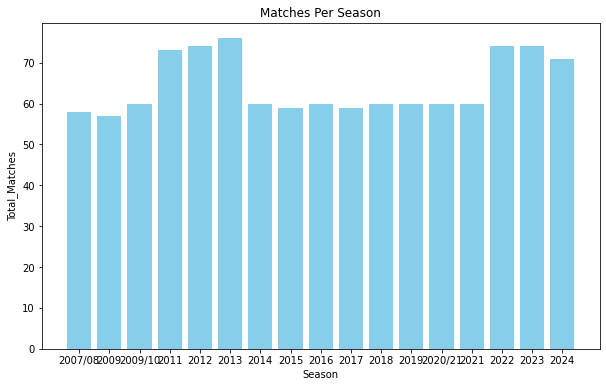

In [0]:

matches_per_season = (matches.groupBy("Season").agg(count("ID").alias("Total_Matches")).orderBy("Season"))

pd_df = matches_per_season.toPandas()

plt.figure(figsize=(10, 6))
plt.bar(pd_df['Season'], pd_df['Total_Matches'], color = 'SkyBlue')
plt.xlabel('Season')
plt.ylabel('Total_Matches')
plt.title('Matches Per Season')


#### 11.Visualize most final matches played by a team?

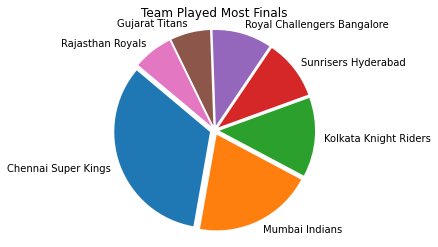

In [0]:
result_pd = team_into_finals().toPandas()
explode = [0.05]*len(result_pd)
plt.figure(figsize=(4,4))
plt.pie(result_pd['no_of_times_into_finals'], labels=result_pd['Team'], autopct=None, startangle=140, explode=explode)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Team Played Most Finals')
plt.show()


#### 12.Who won most man of the matches?

In [0]:
def most_player_of_the_match():
    player_of_the_match = (matches.select("Player_of_Match").groupBy(col("Player_of_Match")).
                           agg(count(col("Player_of_Match")).alias("no_of_times_won")).
                           orderBy(col("no_of_times_won").desc()).limit(1)
    )
    return(player_of_the_match)

display(most_player_of_the_match())

Player_of_Match,no_of_times_won
AB de Villiers,25
